In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=1000
from tqdm import tqdm

In [2]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/lego/df.csv')

In [3]:
df.head()

,set_num,set_name,year,theme_id,num_parts,set_num_len,set_name_len,theme_name,is_city,id,part_num,color_id,quantity,color_name,part_name,is_trans,theme_name_len,part_num_len,color_name_len,part_name_len,is_ninjago
0,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,4,8,Red,Window 1 x 1 x 2 with Glass,0,6,5,3,27,0
1,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,29c01,15,6,White,Window 1 x 1 x 2 with Glass,0,6,5,5,27,0
2,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,15,25,White,Brick 2 x 4 without Cross Supports,0,6,5,5,34,0
3,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,4,9,Red,Brick 2 x 4 without Cross Supports,0,6,5,3,34,0
4,00-1,Weetabix Castle,1970,414,471,4,15,Castle,0,5574.0,3001a,1,4,Blue,Brick 2 x 4 without Cross Supports,0,6,5,4,34,0


In [4]:
df.shape

(580251, 21)

In [5]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'is_city', 'id', 'part_num', 'color_id',
       'quantity', 'color_name', 'part_name', 'is_trans', 'theme_name_len',
       'part_num_len', 'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [6]:
target_names = 'set_num set_name theme_id theme_name is_city id part_num color_name part_name is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'theme_name',
 'is_city',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'is_ninjago']

In [7]:
hyper_table = list()
model = LogisticRegression(class_weight='balanced') # class_weight={0:0.029, 1:0.971})

In [16]:
LogisticRegression?

In [8]:
y = df['is_ninjago']
X_train, X_test, y_train, y_test = train_test_split(df[df.columns], y, test_size= 0.1, random_state=1)

In [9]:
fn = list()
for i, name in tqdm(enumerate(df.columns), total=len(df.columns)):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)
    model.fit(X_train[fn], y_train)
    s_train = model.score(X_train[fn], y_train)
    s_test = model.score(X_test[fn], y_test)
    hyper_table.append(dict(desc=str(fn), train_score=s_train, test_score=s_test, C=model.C, model=model, num_features=df[fn].shape[1], num_rows=df[fn].shape[0], last_feature=fn[-1]))

 76%|██████████████████████████████████████████████████████████████▍                   | 16/21 [00:15<00:06,  1.21s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 81%|██████████████████████████████████████████████████████████████████▍               | 17/21 [00:20<00:07,  1.88s/it]C:\Users\marki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data 

In [10]:
pd.DataFrame(hyper_table).sort_values('test_score')

,desc,train_score,test_score,C,model,num_features,num_rows,last_feature
0,['year'],0.028869,0.031021,1.0,LogisticRegression(class_weight='balanced'),1,580251,year
2,"['year', 'num_parts', 'set_num_len']",0.589945,0.589787,1.0,LogisticRegression(class_weight='balanced'),3,580251,set_num_len
3,"['year', 'num_parts', 'set_num_len', 'set_name...",0.637723,0.636973,1.0,LogisticRegression(class_weight='balanced'),4,580251,set_name_len
9,"['year', 'num_parts', 'set_num_len', 'set_name...",0.638954,0.640144,1.0,LogisticRegression(class_weight='balanced'),10,580251,color_name_len
10,"['year', 'num_parts', 'set_num_len', 'set_name...",0.641386,0.642212,1.0,LogisticRegression(class_weight='balanced'),11,580251,part_name_len
5,"['year', 'num_parts', 'set_num_len', 'set_name...",0.649184,0.649295,1.0,LogisticRegression(class_weight='balanced'),6,580251,quantity
4,"['year', 'num_parts', 'set_num_len', 'set_name...",0.649632,0.649778,1.0,LogisticRegression(class_weight='balanced'),5,580251,color_id
6,"['year', 'num_parts', 'set_num_len', 'set_name...",0.649318,0.649829,1.0,LogisticRegression(class_weight='balanced'),7,580251,is_trans
1,"['year', 'num_parts']",0.653247,0.654793,1.0,LogisticRegression(class_weight='balanced'),2,580251,num_parts
8,"['year', 'num_parts', 'set_num_len', 'set_name...",0.659679,0.659532,1.0,LogisticRegression(class_weight='balanced'),9,580251,part_num_len


In [11]:
y_pred = model.predict(X_test[fn])
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
y_pred.sum() / len(y_pred)

0.3836383690069969

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

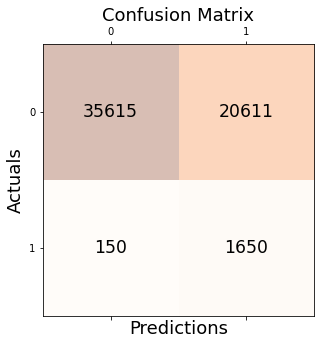

In [14]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [15]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

print('Recall: %.3f' % recall_score(y_test, y_pred))

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.074
Recall: 0.917
Accuracy: 0.642
F1 Score: 0.137
